### Measuring the Correlation of Various Sleep Metrics by Age and Gender

In [13]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# set plt style
plt.style.use('tableau-colorblind10')

In [14]:
# Import data into a dataframe
sleep_df = pd.read_csv('resources/Sleep_Efficiency.csv')
sleep_df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [15]:
# Remove columns that are not needed
sleep_df = sleep_df.iloc[:, :-5]
sleep_df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18


#### Statistical Snapshot of the Data
<!-- - the data covers a diverse range of values which will help us draw realiable conclusions from our analysis -->
<!-- - ages range from 9 to 69, average age is 40.3 
- average sleep duration is 7.5 hours, minimum of 5 hours and maximum of 10 hours
- sleep efficiency ranges from 50% to 99%, average is 78.9%
- REM sleep ranges from 15% to 30%, average is 22.6%
- deep sleep ranges from 18% to 75%, average is 52.8 percent
- light sleep ranges from 7% to 63%, average is 24.6% -->

In [16]:
sleep_df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000


#### Average Sleep Metrics by Age Group
- sleep duration tends to decrease alightly with age
- sleep efficiency tends to increase with age
- REM sleep % increases through adolecense but remains fairly consistent through adulthood
- deep sleep % increases with age but peaks in the 40s and begins to decrease with age (oposite for light sleep)

In [17]:
# define the age groups
bins = [0, 9, 19, 29, 39, 49, 59, 69]
labels = ['< 10', '10s', '20s', '30s', '40s', '50s', '60s']
sleep_df['Age Group'] = pd.cut(sleep_df['Age'], bins=bins, labels=labels)

# group the data by age group
age_group_df = sleep_df.groupby('Age Group').mean().drop(['ID', 'Age'], axis=1)
age_group_df


,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage
Age Group,,,,,
< 10,8.500000,0.520000,18.000000,35.000000,47.000000
10s,7.906250,0.687500,19.312500,42.687500,38.000000
20s,7.415094,0.766509,22.924528,51.745283,25.330189
30s,7.568421,0.813474,23.084211,55.694737,21.221053
40s,7.367347,0.807347,22.397959,54.683673,22.918367
50s,7.392157,0.801569,22.656863,52.872549,24.470588
60s,7.602941,0.754706,22.529412,47.941176,29.529412


#### Visualizing the distribution of sleep metrics by age group (outliers?)

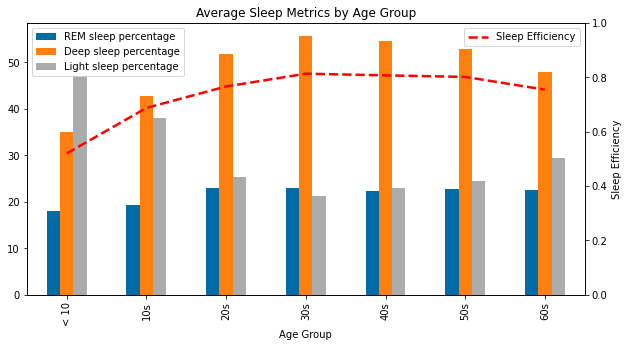

In [18]:
# Create a bar chart of sleep metrics by age group
age_group_df.drop('Sleep duration', axis=1, inplace=True)

fig, ax1 = plt.subplots(figsize=(10,5))
age_group_df.drop('Sleep efficiency', axis=1).plot(kind='bar', ax=ax1, title='Average Sleep Metrics by Age Group')

# secondary y-axis for 'Sleep efficiency'
ax2 = ax1.twinx()

# Plot sleep efficiency as a line on the secondary axis
age_group_df['Sleep efficiency'].plot(ax=ax2, color='red', linewidth=2.5, linestyle='--')

# Set y-axis label for secondary axis
ax2.set_ylabel('Sleep Efficiency')

# Set y-axis limits for secondary axis
ax2.set_ylim(0, 1)

# Add a legend for the secondary axis
ax2.legend(['Sleep Efficiency'], loc='upper right')

# Show the chart
plt.show()

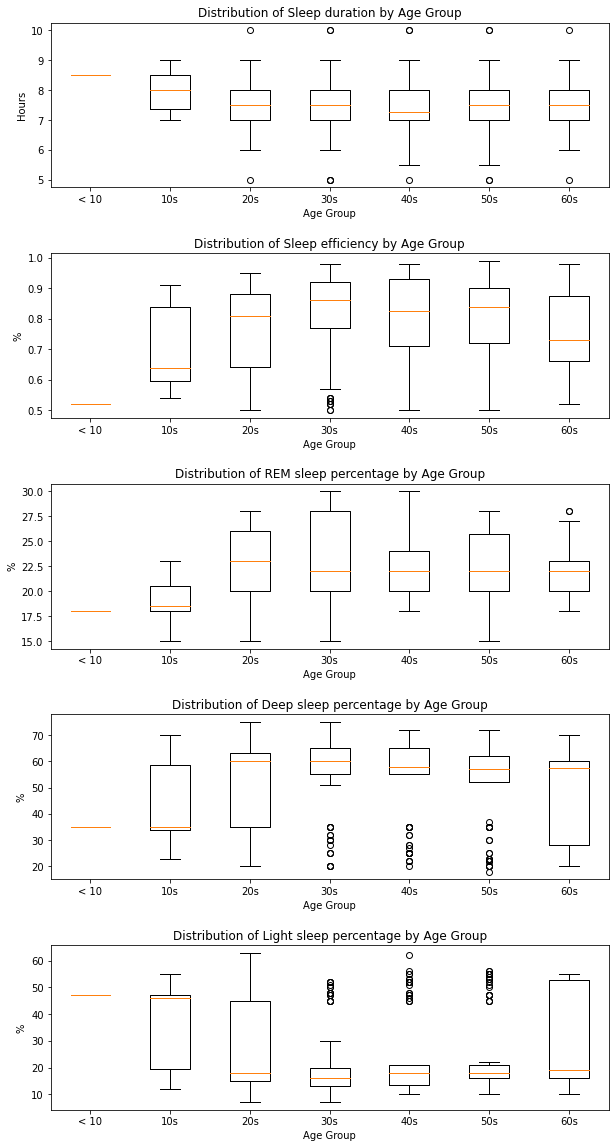

In [19]:
# boxplots to visualize the distribution of sleep metrics by age group and identify outliers

fig, axs = plt.subplots(ncols=1, nrows=5, figsize=(10, 20))
fig.subplots_adjust(hspace=0.4)

metrics = ['Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage']
age_groups = ['< 10', '10s', '20s', '30s', '40s', '50s', '60s']

for i, metric in enumerate(metrics):
    data = [sleep_df.loc[sleep_df['Age Group'] == age_group, metric] for age_group in age_groups]
    axs[i].set_title(f'Distribution of {metric} by Age Group')
    axs[i].set_ylabel('Hours' if metric == 'Sleep duration' else '%')
    axs[i].set_xlabel('Age Group')
    axs[i].boxplot(data, labels=age_groups)

plt.show()

#### Detailed Correlation of Sleep Metrics by Age Group

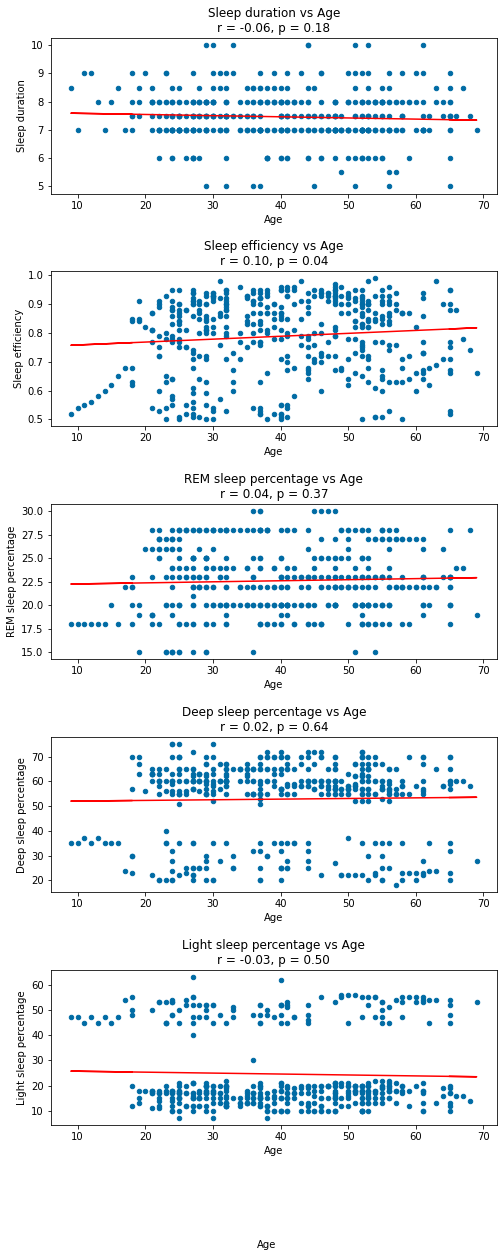

In [20]:
columns = ['Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage']

# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 20))

# Loop through each column and plot the data on the corresponding subplot
for i, column in enumerate(columns):
    sleep_df.plot.scatter(x='Age', y=column, ax=axs[i])

    r_value, p_value = pearsonr(sleep_df['Age'], sleep_df[column])
    axs[i].set_title(f'{column} vs Age\nr = {r_value:.2f}, p = {p_value:.2f}')

    m, b = np.polyfit(sleep_df['Age'], sleep_df[column], 1)
    axs[i].plot(sleep_df['Age'], m * sleep_df['Age'] + b, color='red')

# Add x-axis label and adjust subplot spacing
fig.text(0.5, 0.04, 'Age', ha='center')
fig.subplots_adjust(hspace=0.5)

# Save the figure
plt.savefig('output/age_vs_sleep.png')

#### Average Sleep Metrics by Gender
- Solely based on the averages, there seems to be minimal differences in sleep metrics between genders
- However, averages may not represent each individual's sleep patterns, further analysis is need to draw more definitve conclusions

In [21]:
# group and average by gender
gender_group_df = sleep_df.groupby('Gender').mean().drop(['ID', 'Age'], axis=1)
gender_group_df

,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage
Gender,,,,,
Female,7.504464,0.787545,23.187500,51.625,25.187500
Male,7.427632,0.790263,22.052632,54.000,23.947368


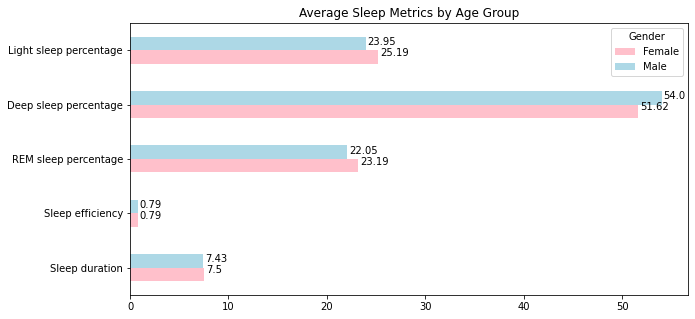

In [22]:
# Create a bar chart of sleep metrics by gender
ax = gender_group_df.T.plot(kind='barh', figsize=(10,5), title='Average Sleep Metrics by Age Group', color=['pink', 'lightblue'])

# Add labels to the bars
for i, v in enumerate(gender_group_df.T.values):
    ax.text(v[0] + 0.2, i - 0.1, str(round(v[0], 2)), color='black')
    ax.text(v[1] + 0.2, i + 0.1, str(round(v[1], 2)), color='black')


#### Visualizing the distribution of sleep metrics by Gender (outliers?)

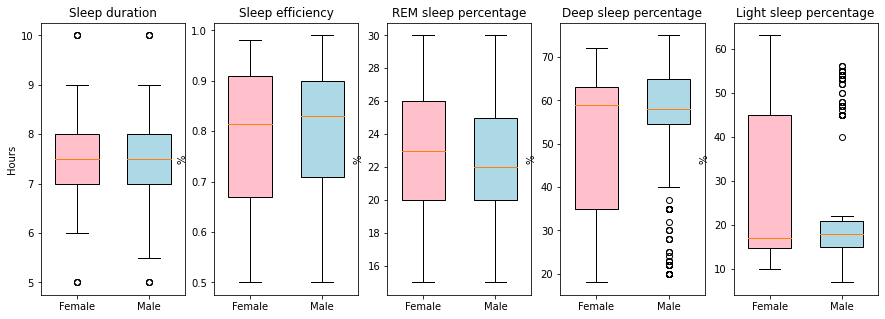

In [23]:
# boxplot to check or potential outliers

fig, axs = plt.subplots(ncols=5, figsize=(15,5))

for i, column in enumerate(columns):
    female_data = sleep_df[sleep_df['Gender'] == 'Female'][column]
    male_data = sleep_df[sleep_df['Gender'] == 'Male'][column]
    
    # Create boxplot
    bp = axs[i].boxplot([female_data, male_data], widths=0.6, patch_artist=True, labels=['Female', 'Male'])
    
    # Set colors for the boxes
    for patch, color in zip(bp['boxes'], ['pink', 'lightblue']):
        patch.set_facecolor(color)
    
    axs[i].set_title(column)
    axs[i].set_ylabel('Hours' if column == 'Sleep duration' else '%')

# Save the figure
plt.savefig('output/age_vs_sleep.png')

plt.show()


#### Detailed Correclation of Sleep Metrics by Gender

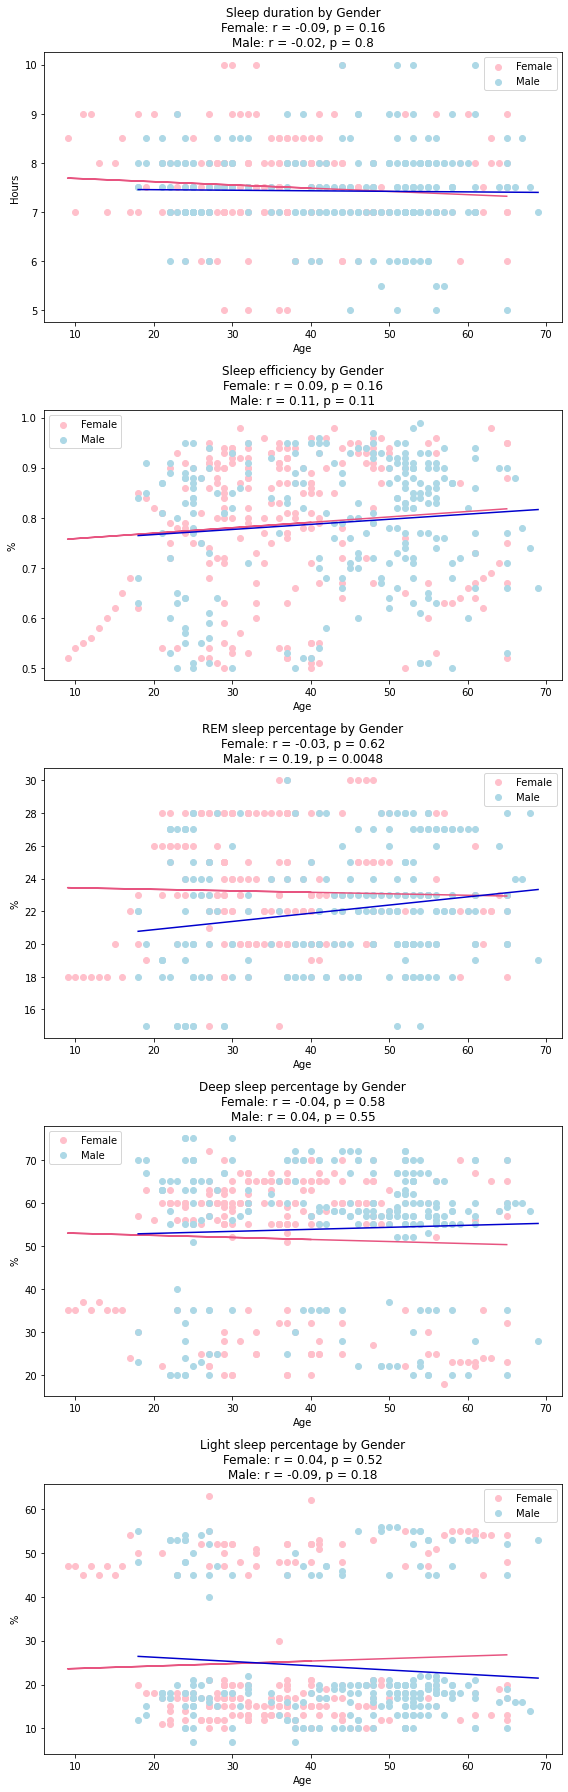

In [24]:
# Create separate dataframes for females and males
female_df = sleep_df[sleep_df['Gender'] == 'Female']
male_df = sleep_df[sleep_df['Gender'] == 'Male']

# Set the columns for the scatter plots
columns = ['Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage']

# Create scatter plots for each of the sleep metrics
fig, axs = plt.subplots(5, 1, figsize=(8, 25))
for i, column in enumerate(columns):
    axs[i].scatter(female_df['Age'], female_df[column], color='pink', label='Female')
    axs[i].scatter(male_df['Age'], male_df[column], color='lightblue', label='Male')
    
    # Add regression lines and calculate R values and p-values
    female_fit = np.polyfit(female_df['Age'], female_df[column], 1)
    female_r, female_p = pearsonr(female_df['Age'], female_df[column])
    
    male_fit = np.polyfit(male_df['Age'], male_df[column], 1)
    male_r, male_p = pearsonr(male_df['Age'], male_df[column])
    
    axs[i].plot(female_df['Age'], np.poly1d(female_fit)(female_df['Age']), color='#e75480')
    axs[i].plot(male_df['Age'], np.poly1d(male_fit)(male_df['Age']), color='mediumblue')
    
    axs[i].set_title(f'{column} by Gender\nFemale: r = {female_r:.2f}, p = {female_p:.2g}\nMale: r = {male_r:.2f}, p = {male_p:.2g}')
    axs[i].set_xlabel('Age')
    axs[i].set_ylabel('Hours' if column == 'Sleep duration' else '%')
    axs[i].legend()
    

# Save the figure
plt.savefig('output/gender_vs_sleep.png')

plt.tight_layout()
plt.show()

